# importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading data

In [3]:
data = pd.read_csv("data_for_lr.csv")
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


# data preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
data = data.dropna()
print("shape of data is : ",data.shape)

shape of data is :  (699, 2)


# splitting data

In [7]:
# traning input and output
train_input = np.array(data['x'][0:500]).reshape(500, 1)
train_output = np.array(data['y'][0:500]).reshape(500, 1)

# validation data input and output
test_input = np.array(data['x'][500:700]).reshape(199, 1)
test_output = np.array(data['y'][500:699]).reshape(199, 1)

# <font color="green">Linear Regression</font>
## forward propogation
f(x) = mx + c

In [8]:
def forward_propogation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(train_input, m) + c
    
    return predictions

## cost function
summ(1/2n*(f(x)-y)^2)

In [9]:
def cost_function(predictions, train_output):
    
    cost = np.mean((predictions - train_output)**2)*0.5
    
    return cost

## Gradient Decent for Backwardpropagation
df = summ(f(x) - y)/n

dm = df*m

dc = df*1

In [10]:
def backward_propagation(train_input, train_output, predictions):
    
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_output))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Update parameters
m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [11]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - (learning_rate * derivatives['dm'])
    parameters['c'] = parameters['c'] - (learning_rate * derivatives['dc'])
    
    return parameters

## training

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0.1)
    
    plt.figure()
    loss = list()
    #iters
    for i in range(iters):
        
        #forward ppropagration
        predictions = forward_propogation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"interations = {i+1}, loss = {loss}")
        
        #plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='original')
        ax.plot(train_input, predictions, '*', label='training')
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+', label='original')
        plt.plot(train_input, predictions, '*', label='training')
        plt.show()
        
        #back propagation
        derivaties = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivaties, learning_rate)
        
    return parameters, loss
    

# training

interations = 1, loss = [1427.2318699881118]


<Figure size 640x480 with 0 Axes>

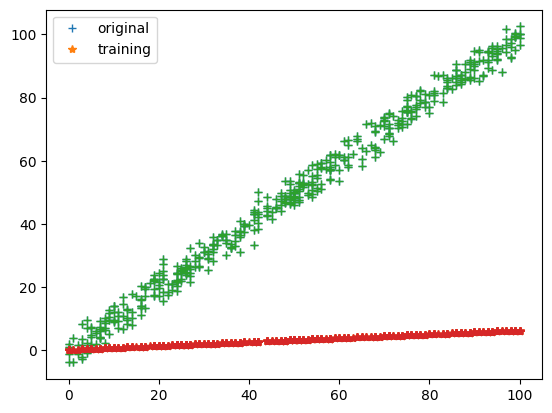

interations = 2, loss = [1427.2318699881118, 649.6839686080498]


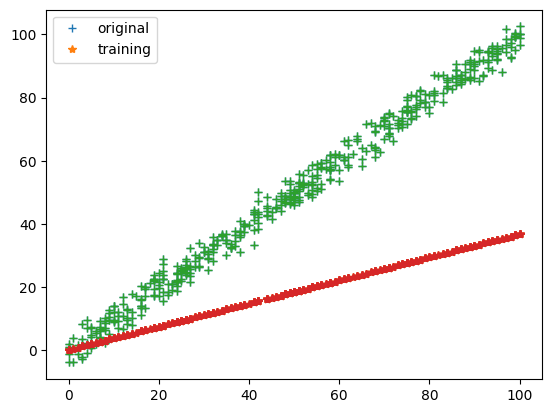

interations = 3, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184]


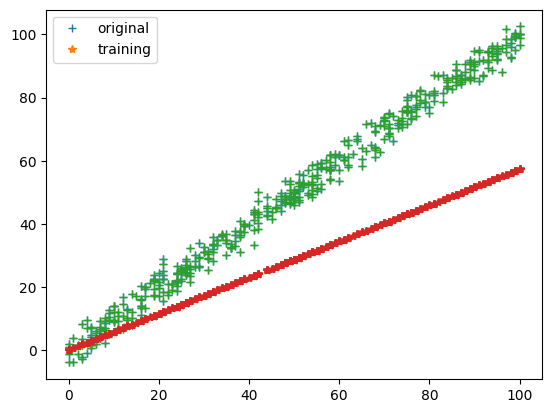

interations = 4, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789]


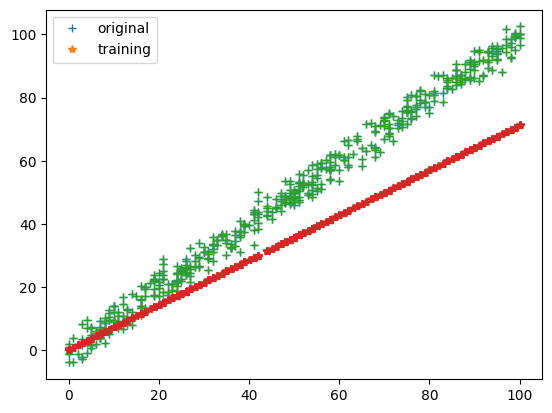

interations = 5, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549]


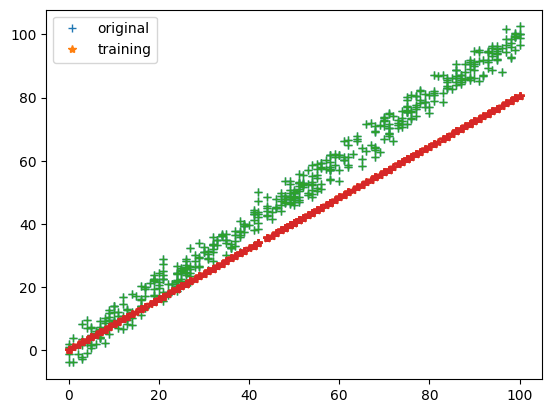

interations = 6, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853]


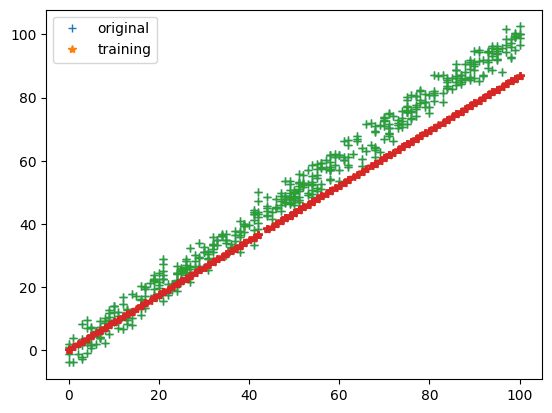

interations = 7, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358]


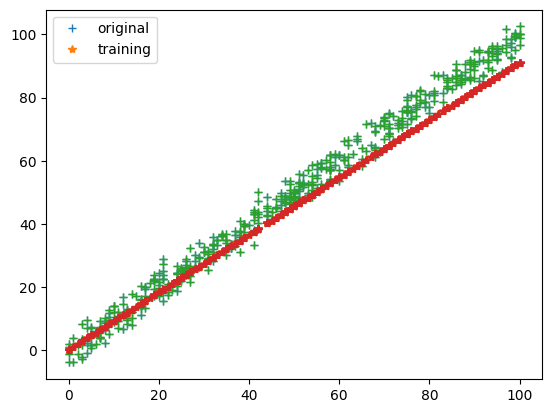

interations = 8, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028]


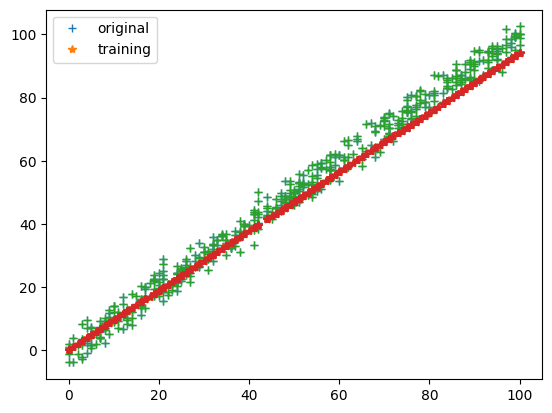

interations = 9, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375]


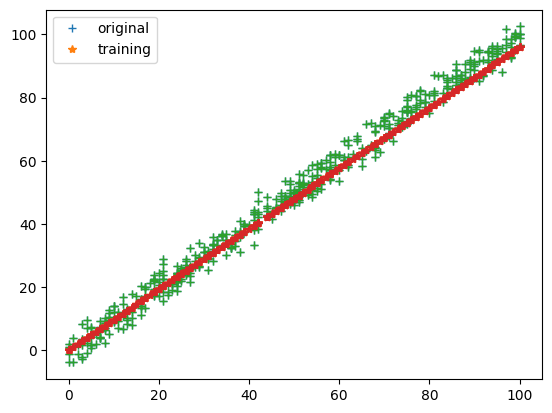

interations = 10, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398]


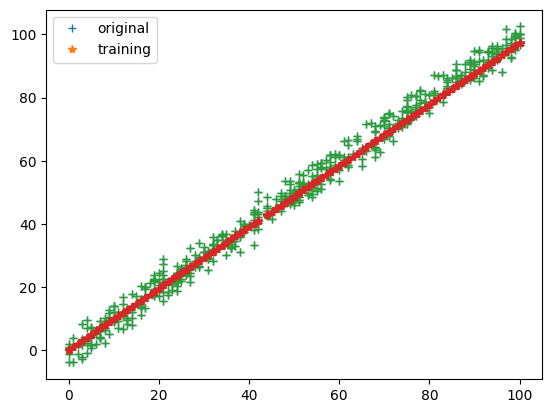

interations = 11, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893]


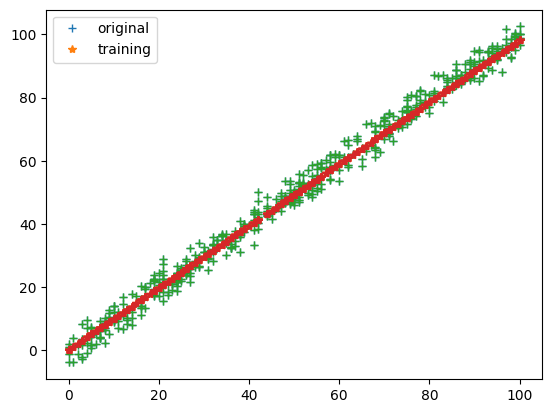

interations = 12, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575]


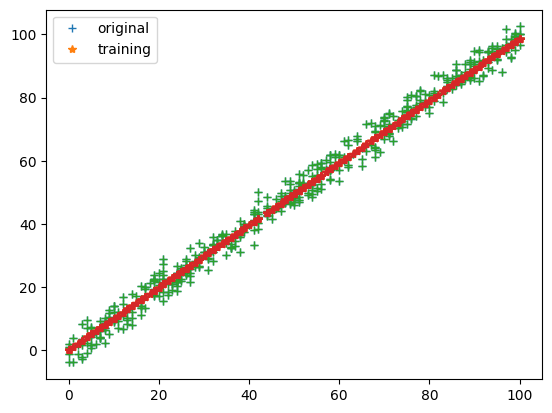

interations = 13, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773]


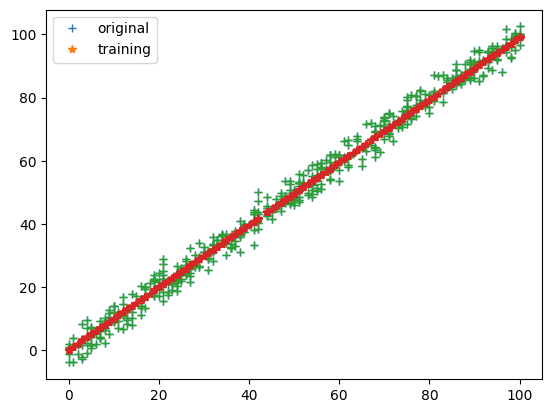

interations = 14, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773, 3.9458624118129886]


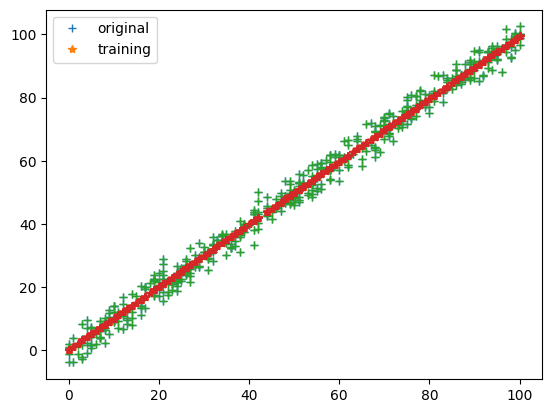

interations = 15, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773, 3.9458624118129886, 3.9323654831373505]


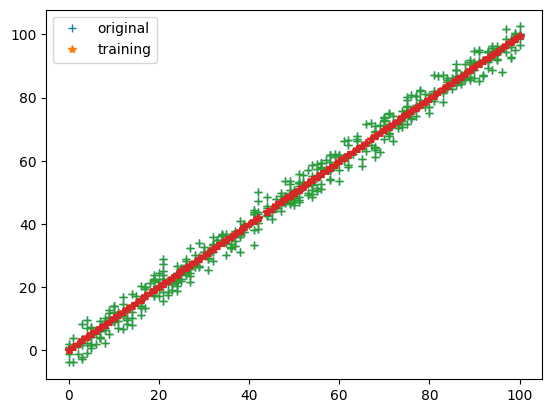

interations = 16, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773, 3.9458624118129886, 3.9323654831373505, 3.9293680529544392]


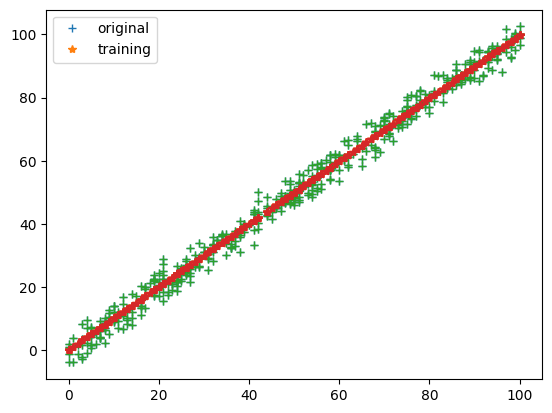

interations = 17, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773, 3.9458624118129886, 3.9323654831373505, 3.9293680529544392, 3.930122965264332]


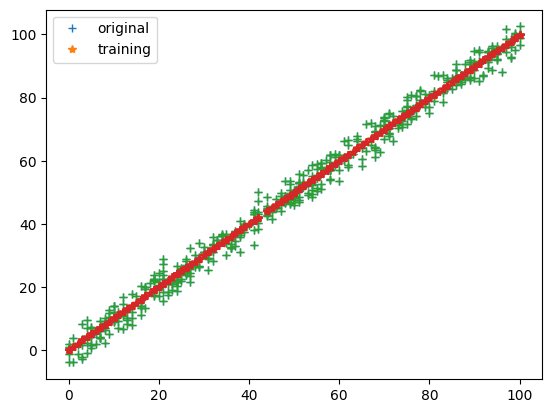

interations = 18, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773, 3.9458624118129886, 3.9323654831373505, 3.9293680529544392, 3.930122965264332, 3.9318945208128415]


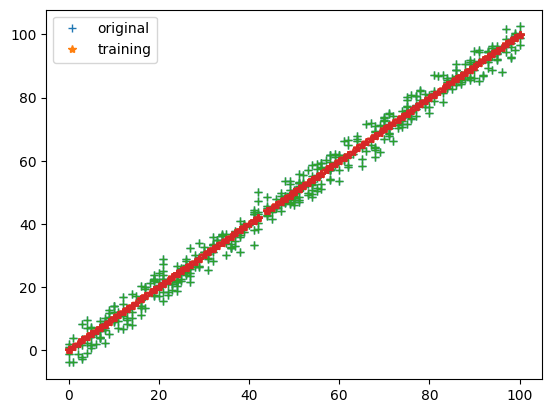

interations = 19, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773, 3.9458624118129886, 3.9323654831373505, 3.9293680529544392, 3.930122965264332, 3.9318945208128415, 3.933663101915737]


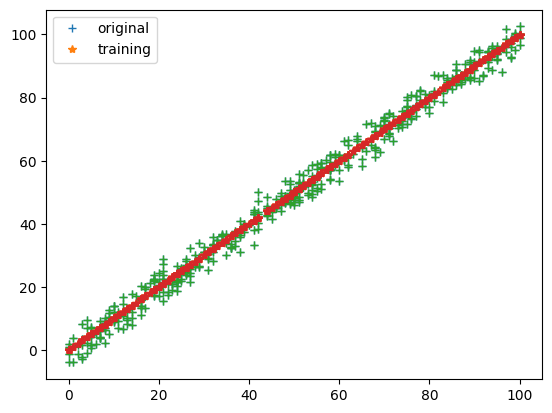

interations = 20, loss = [1427.2318699881118, 649.6839686080498, 296.5552887835184, 136.2954154088789, 63.64320785616549, 30.759978866933853, 15.91245747877358, 9.232733741831028, 6.244091668998375, 4.918154062672398, 4.33759632443893, 4.0887287893989575, 3.9857792028804773, 3.9458624118129886, 3.9323654831373505, 3.9293680529544392, 3.930122965264332, 3.9318945208128415, 3.933663101915737, 3.9351164729304893]


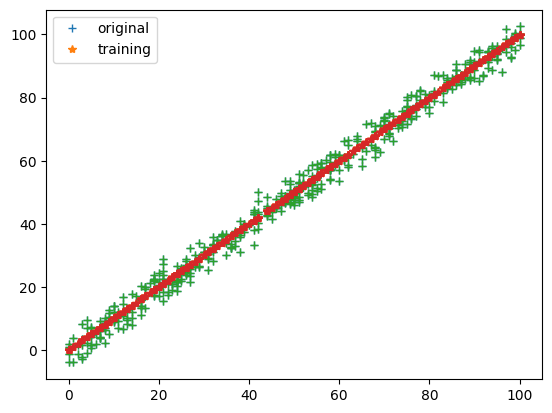

In [39]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [17]:
parameters['m']
parameters['c']

0.7899753598532342

## Lets Predict 

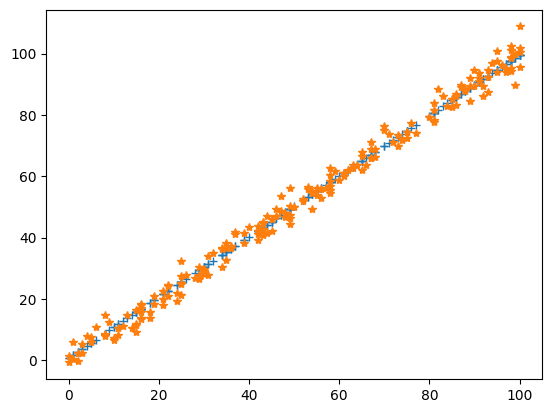

In [24]:
test_predictions = test_input * parameters['m'] + parameters['c']
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, "*")
plt.show()

In [26]:
# calculate cost 
cost_function(test_predictions, test_output)
# it means we have +-3 of loss from actual data

3.996513774490646

## <font color="green">Linear Regression</font>

In [29]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 445.2 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.2 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-non

In [30]:
# linear regression using modules
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [31]:
lr_model.fit(train_input, train_output)

LinearRegression()

In [32]:
lr_model.coef_

array([[1.0009993]])

In [33]:
lr_model.intercept_

array([-0.23603461])

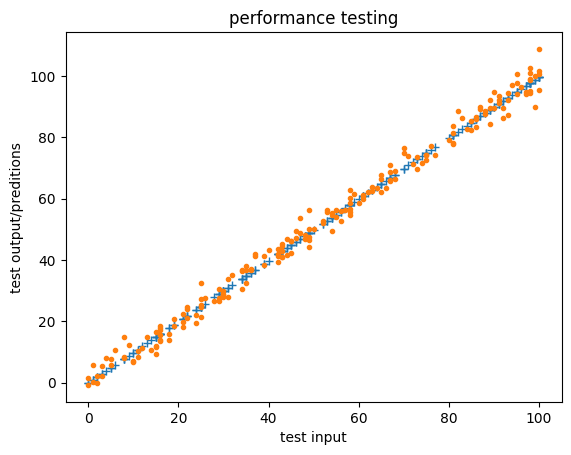

In [48]:
# predictions
test_predictions = lr_model.predict(test_input)
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output, '.')
plt.title("performance testing")
plt.xlabel("test input")
plt.ylabel("test output/preditions")
plt.show()

## cost

In [50]:
from sklearn.metrics import mean_squared_error
cost  = mean_squared_error(test_input, test_predictions)
cost

0.034924736049889604